In [1]:
import numpy as np
import matplotlib.pyplot as plt
from transformer_payne import Blackbody
import jax.numpy as jnp
from spice.models.mesh_model import IcosphereModel
from spice.models.mesh_view import get_mesh_view
import matplotlib
import phoebe
%matplotlib inline

Connection to online passbands at https://tables.phoebe-project.org could not be established.  Check your internet connection or try again later (can manually call phoebe.list_online_passbands(refresh=True) to retry).  If the problem persists and you're using a Mac, you may need to update openssl (see https://phoebe-project.org/help/faq). Original error from urlopen: URLError <urlopen error [Errno 101] Network is unreachable>
float_dtype: <class 'jax.numpy.float32'>


In [2]:
import pickle
#data_5000 = pickle.load(open('/Users/mjablons/Documents/stellar-mesh-integration/lc_eclipse/eclipses_incl_90.0_period_1.0_q_1.0_ecc_0.0_primary_mass_1.0.pkl', 'rb'))
data_20000 = pickle.load(open('scr_mk27/eclipse_grid_20000_small/eclipses_incl_90.0_period_10.0_q_0.5_ecc_0.0_primary_mass_1.0.pkl', 'rb'))

: 

In [3]:
# # Convert fluxes (W/m^2) to magnitudes (relative, zero point arbitrary)
fluxes_20000 = data_20000['fluxes_phoebe']
mags_20000 = -2.5 * np.log10(fluxes_20000 / 2.5e8)

In [4]:
# fluxes_5000 = data_5000['fluxes_phoebe']
# mags_5000 = -2.5 * np.log10(fluxes_5000 / 2.5e8)

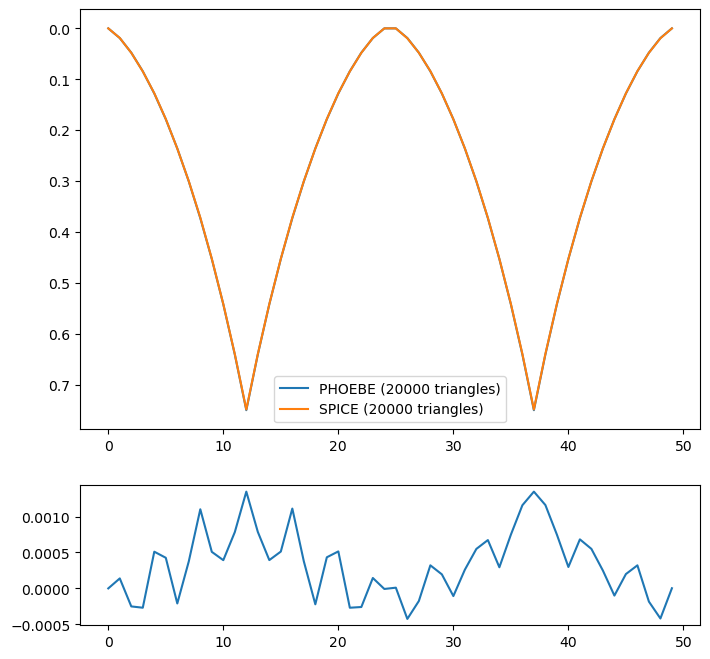

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), height_ratios=[3, 1])
ax[0].plot(mags_20000-mags_20000[0], label='PHOEBE (20000 triangles)')
ax[0].plot(data_20000['bol_lum'], label='SPICE (20000 triangles)')
# ax[0].plot(mags_5000-mags_5000[0], label='PHOEBE (5000 triangles)')
# ax[0].plot(data_5000['bol_lum'], label='SPICE (5000 triangles)')
ax[0].invert_yaxis()
ax[0].legend()
ax[1].plot((mags_20000-mags_20000[0])-data_20000['bol_lum'])
plt.show()

In [11]:
data_20000['spice_binary'].n_neighbours2

Array(1, dtype=int32, weak_type=True)

In [6]:
from spice.plots.plot_mesh import plot_3D_binary, animate_binary
animate_binary(data_20000['spice_body1'], data_20000['spice_body2'], 'phoebe_cross_check.gif', scale_radius=2,
               property='visible_cast_areas', cmap='cmr.infinity')

KeyError: 'spice_body1'

In [20]:
data_5000.keys()

dict_keys(['phoebe_binary', 'spice_body1', 'spice_body2', 'fluxes_phoebe', 'bol_lum', 'times', 'n_times', 'sma', 'primary_mass', 'secondary_mass', 'inclination', 'period', 'q', 'ecc'])